In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import sklearn.linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline
sns.set_style('dark')

## Models to try
1) Simple linear regression
2) Lasso
3) Ridge
4) complex model 6 features
5) model w all features
6) Polynomial

* make a datarframe containing the results of all the models
* results to look for: R^2, MSE
    Make it for both training and test sets
    
    
    
* Year built, 
* Whether renovation has been done yet
* lot to house ratio

#Write down the goal/question
For technical, show that the modeling is correct
For the non-technical, exlpain why the model is important and how does it help

In [2]:
raw_data = pd.read_csv("kc_house_data.csv")
display(raw_data.head())
print(raw_data.dtypes)
print(raw_data.shape)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
(21613, 21)


In [3]:
display(raw_data.notnull().all())
raw_data.dtypes

id               True
date             True
price            True
bedrooms         True
bathrooms        True
sqft_living      True
sqft_lot         True
floors           True
waterfront       True
view             True
condition        True
grade            True
sqft_above       True
sqft_basement    True
yr_built         True
yr_renovated     True
zipcode          True
lat              True
long             True
sqft_living15    True
sqft_lot15       True
dtype: bool

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Exploration

In [4]:
raw_data.drop(['id', 'date'], axis=1, inplace=True)
raw_data.shape

(21613, 19)

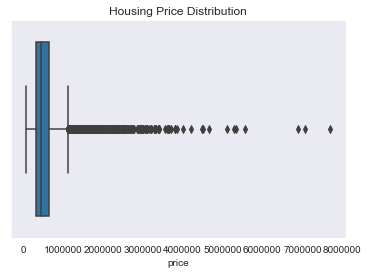

In [5]:
sns.boxplot(raw_data['price'])
plt.title("Housing Price Distribution")
plt.show()
drop = raw_data.loc[raw_data['price']>raw_data['price'].quantile(.93)]

In [6]:
raw_data.drop(drop.index, inplace=True)
raw_data.shape

(20108, 19)

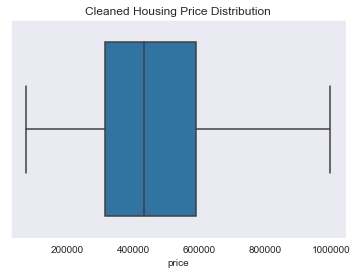

count     20108.000000
mean     466642.586980
std      195115.434614
min       75000.000000
25%      313500.000000
50%      432700.000000
75%      590000.000000
max      998000.000000
Name: price, dtype: float64

In [7]:
sns.boxplot(raw_data['price'])
plt.title("Cleaned Housing Price Distribution")
plt.show()
raw_data['price'].describe()

In [ ]:
home_info = raw_data.loc[:, ('price', 'sqft_living', 'sqft_lot', 'yr_built')]
sns.set_style(style='dark')
g = sns.PairGrid(home_info, diag_sharey=False)
g.map_upper(sns.scatterplot, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()
#We got some outliers in both bedrooms and sqft lot, so lets take care of those in a bit

In [ ]:
cat = raw_data.loc[:, ['price', 'floors','bedrooms', 'bathrooms', 'waterfront', 'view', 'condition']]

g = sns.PairGrid(cat, y_vars=['price'], x_vars=['floors', 'waterfront', 'view', 'condition'], height=5, aspect=.65)
g = g.map(sns.boxenplot, color='brown')

plt.show()

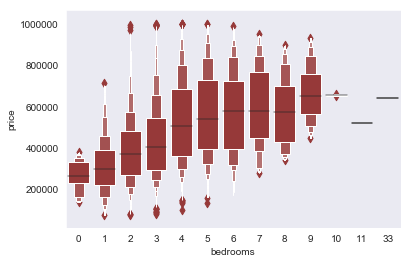

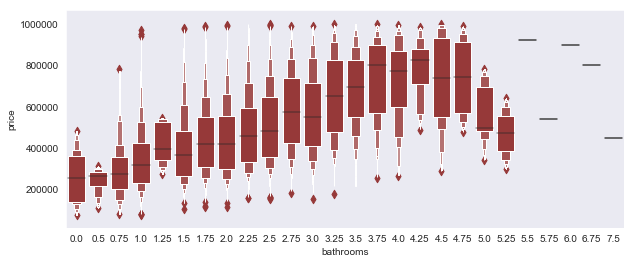

In [8]:
sns.boxenplot(raw_data['bedrooms'], y=raw_data['price'], color='brown')
plt.show()
plt.figure(figsize=(10,4))
sns.boxenplot(raw_data['bathrooms'], y=raw_data['price'], color='brown', width=.8)
plt.show()

In [8]:
house_drop = raw_data.loc[raw_data['bedrooms']>10].index
#outlier detection and removal

In [9]:
raw_data = raw_data.drop(index=house_drop) #try transformations to see if the peaks can be treated

C:\Users\sohai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


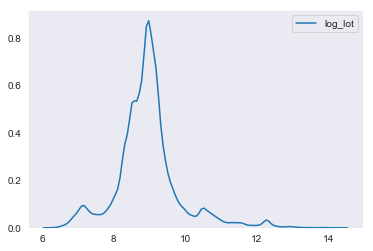

In [10]:
raw_data['log_lot'] = raw_data['sqft_lot'].map(np.log)
sns.kdeplot(raw_data['log_lot'])
bed_drop = raw_data.loc[raw_data['bedrooms']==0].index

In [11]:
raw_data = raw_data.drop(index=bed_drop)

C:\Users\sohai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


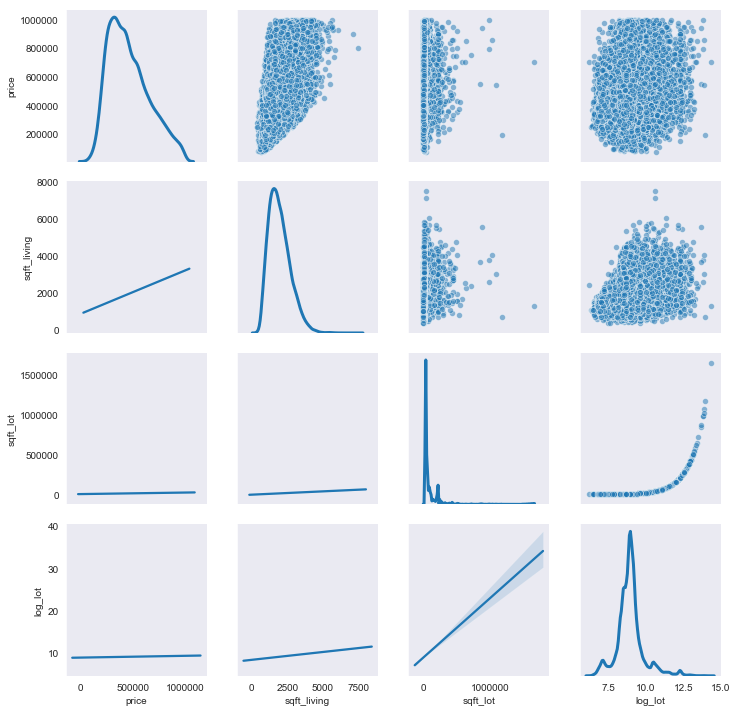

In [12]:
home_info = raw_data.loc[:, ('price', 'sqft_living', 'sqft_lot', 'log_lot')]
g = sns.PairGrid(home_info, diag_sharey=False)
g.map_upper(sns.scatterplot, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()
#try transformations of the jagged peaks of soem variables

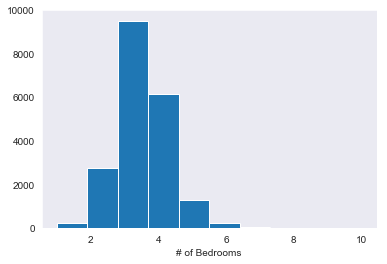

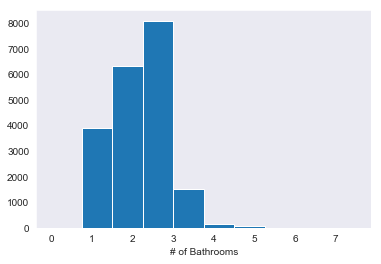

In [13]:
plt.hist(raw_data['bedrooms'])
plt.xlabel("# of Bedrooms")
plt.show()

plt.hist(raw_data['bathrooms'])
plt.xlabel("# of Bathrooms")
plt.show()

# Data Preparation

In [54]:
#raw_data['zipcode'].nunique()
raw_data['zipcode'] = raw_data['zipcode'].astype('object')

In [55]:
raw_data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
log_lot          float64
dtype: object

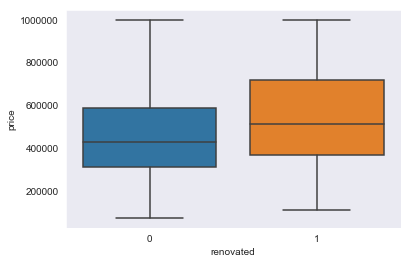

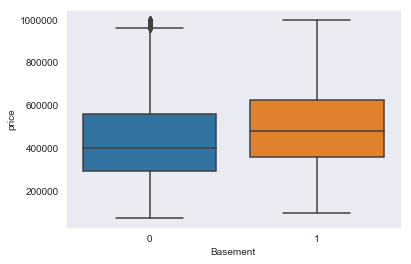

In [16]:
raw_data['renovated'] = np.where(raw_data['yr_renovated']>0, 1, 0)
sns.boxplot(x='renovated', y='price', data=raw_data)
plt.show()
raw_data['Basement'] = np.where(raw_data['sqft_basement']>0, 1, 0)
sns.boxplot(x='Basement', y='price', data=raw_data)
plt.show()

In [17]:
#Remove redundant variables and make a pointer for dummy variables for zipcode
dummies = pd.get_dummies(raw_data['zipcode'])
raw_data.drop(['sqft_living15', 'sqft_lot15', 'yr_renovated', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
               'sqft_lot', 'zipcode'], 1, inplace=True)

In [18]:
X = raw_data.drop('price', 1)
Y = raw_data['price']
#make dummies for the zipcode
X_dummy = pd.concat([X, dummies], axis=1)
#Dropping some features that are no longer needed"
colnames = X_dummy.columns

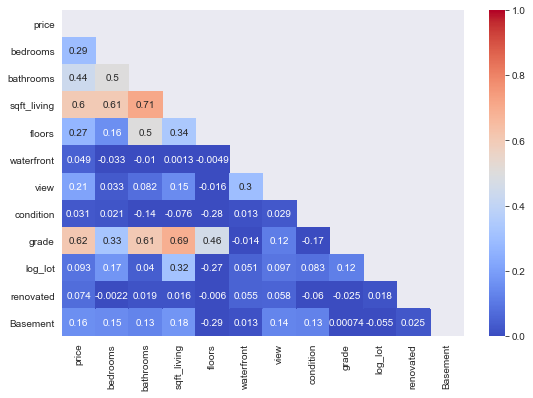

In [21]:
corrmat = raw_data.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(9,6))
sns.heatmap(raw_data.corr(), vmin=0, vmax=1, annot=True, mask=mask, cmap='coolwarm')
# sqft_living has the highest correlation w price, so we can use that for the simple linear regression

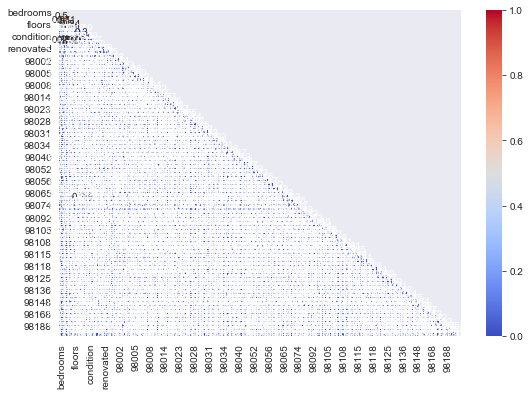

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,log_lot,renovated,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
bedrooms,1.000000,0.502994,0.605188,0.158032,-0.033145,0.032614,0.020725,0.325442,0.174673,-0.002159,...,-0.025376,-0.010839,-0.001362,0.008805,-0.042723,0.002576,-0.002519,0.010724,-0.019243,-0.036796
bathrooms,0.502994,1.000000,0.711682,0.502992,-0.010206,0.081958,-0.140937,0.606558,0.039666,0.018789,...,-0.072059,-0.018534,-0.052017,-0.026363,-0.100326,-0.010956,-0.052112,-0.020443,-0.043400,-0.015312
sqft_living,0.605188,0.711682,1.000000,0.336507,0.001309,0.150521,-0.076105,0.693438,0.315393,0.015825,...,-0.056515,-0.024245,-0.039617,0.006068,-0.074849,0.019480,-0.035724,-0.016498,-0.035504,-0.017552
floors,0.158032,0.502992,0.336507,1.000000,-0.004940,-0.016470,-0.279596,0.457398,-0.272525,-0.006013,...,-0.057519,-0.025881,-0.073323,-0.049028,-0.067534,-0.046043,-0.062323,-0.037376,-0.055510,-0.015530
waterfront,-0.033145,-0.010206,0.001309,-0.004940,1.000000,0.300407,0.012981,-0.014449,0.050987,0.054657,...,0.025523,-0.002845,-0.007980,0.070979,-0.006213,-0.005650,0.051852,-0.004403,0.065781,-0.006010
view,0.032614,0.081958,0.150521,-0.016470,0.300407,1.000000,0.028922,0.116105,0.096771,0.058092,...,0.030127,-0.013921,-0.010357,0.069871,-0.027592,0.056379,0.064446,-0.001846,0.078328,0.027192
condition,0.020725,-0.140937,-0.076105,-0.279596,0.012981,0.028922,1.000000,-0.174478,0.083415,-0.059858,...,-0.022749,-0.027629,0.017432,0.029109,-0.028712,0.007969,-0.014428,-0.009404,0.006328,0.012544
grade,0.325442,0.606558,0.693438,0.457398,-0.014449,0.116105,-0.174478,1.000000,0.119378,-0.025394,...,-0.086743,-0.029243,-0.054093,-0.022693,-0.114293,0.018311,-0.079449,-0.037968,-0.049098,0.010359
log_lot,0.174673,0.039666,0.315393,-0.272525,0.050987,0.096771,0.083415,0.119378,1.000000,0.017795,...,0.002527,0.006244,0.029339,0.044612,0.031726,0.013047,-0.003849,0.019105,0.016353,-0.074788
renovated,-0.002159,0.018789,0.015825,-0.006013,0.054657,0.058092,-0.059858,-0.025394,0.017795,1.000000,...,0.031240,-0.005354,0.001846,0.034329,-0.004101,0.025132,0.001306,-0.006295,0.002052,0.016361


In [25]:
corrmat = X_dummy.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(9,6))
sns.heatmap(corrmat, vmin=0, vmax=1, annot=True, mask=mask, cmap='coolwarm')
plt.show()
display(corrmat)

In [26]:
print("Correlations of features against Price")
display(raw_data.corr().iloc[:, 0].sort_values(ascending=False))
raw_data.columns
#sqft a good candidate for a simple linear regression

Correlations of features against Price


price          1.000000
grade          0.616729
sqft_living    0.604347
bathrooms      0.439852
bedrooms       0.294982
floors         0.269729
view           0.211125
Basement       0.158084
log_lot        0.092555
renovated      0.074424
waterfront     0.049293
condition      0.030531
Name: price, dtype: float64

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'log_lot', 'renovated', 'Basement'],
      dtype='object')

In [27]:
#Creating funciton for the adjusted R^2
def AdjustedR(r2, n, k):
    return 1 - ((1-r2) * (n-1) / (n-k-1))

In [28]:
# First, we make a dataframe to hold the results of our evaluations
evaluation = pd.DataFrame(index=np.arange(0,5),
                          columns=['Model', 'Mean Absolute Error (MAE)', 'R^2 Test', 'Adjusted R^2 (Test)'])

# PCA for colinear features

In [29]:
from sklearn.preprocessing import StandardScaler
df_pca = X.loc[:, ['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors']]
scalar = StandardScaler()
scalar = scalar.fit_transform(df_pca)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principal_comp = pca.fit_transform(scalar)

df_components = pd.DataFrame(principal_comp, index=X.index, columns=['Living Quality'])


In [31]:
X_ = pd.concat([df_components, X], 1)
X_dummy_pca = pd.concat([df_components, X_dummy], 1)

In [32]:
X_.drop(['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors'], axis=1, inplace=True)
X_dummy_pca.drop(['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors'], axis=1, inplace=True)

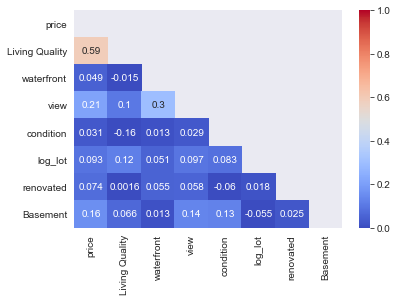

In [33]:
X_pca = pd.concat([raw_data['price'], X_], 1)
corrmat = X_pca.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X_pca.corr(), vmin=0, vmax=1, mask=mask, annot=True, cmap='coolwarm')

# Center predictor variables so we can have a more robust linear model

In [34]:
scalar = StandardScaler(with_std=True) 
scaled = scalar.fit_transform(X) #for lasso and the basic regression on non-PCA features
pc_scaled = scalar.fit_transform(X_.iloc[:, 1:]) #PCA data scaled, dont want to scale PCA any further
pc_scaleddf = pd.DataFrame(pc_scaled, index=X_.iloc[:, 1:].index, columns=X_.iloc[:, 1:].columns)
scaled_df = pd.DataFrame(scaled, index=X.index, columns=X.columns)
X_scaled = pd.concat([scaled_df, dummies], 1) #final dataframe that we will use
X_pca_scaled = pd.concat([df_components, pc_scaleddf, dummies], 1) # final pca data
#standardize features so that any extreme values in features are accounted for and coefficients are more interpretable


In [35]:
print('Original features scaled:')
display(X_scaled.head())
print("\nPost PCA features scaled:")
X_pca_scaled.head()

Original features scaled:


,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,log_lot,renovated,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,-0.362555,-1.478081,-1.024976,-0.877909,-0.053335,-0.261012,-0.626795,-0.496290,-0.356347,-0.194157,...,0,0,0,0,0,0,1,0,0,0
1,-0.362555,0.302104,0.816632,0.987149,-0.053335,-0.261012,-0.626795,-0.496290,-0.078523,5.150475,...,0,0,0,0,0,0,0,0,0,0
2,-1.497729,-1.478081,-1.568184,-0.877909,-0.053335,-0.261012,-0.626795,-1.484493,0.282619,-0.194157,...,0,0,0,0,0,0,0,0,0,0
3,0.772619,1.370216,0.008444,-0.877909,-0.053335,-0.261012,2.473240,-0.496290,-0.493129,-0.194157,...,0,0,0,0,0,0,0,0,0,0
4,-0.362555,-0.053933,-0.362527,-0.877909,-0.053335,-0.261012,-0.626795,0.491913,0.044020,-0.194157,...,0,0,0,0,0,0,0,0,0,0



Post PCA features scaled:


,Living Quality,waterfront,view,condition,log_lot,renovated,Basement,98001,98002,98003,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,-1.943410,-0.053335,-0.261012,-0.626795,-0.356347,-0.194157,-0.776767,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.541613,-0.053335,-0.261012,-0.626795,-0.078523,5.150475,1.287387,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-3.117038,-0.053335,-0.261012,-0.626795,0.282619,-0.194157,-0.776767,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.452110,-0.053335,-0.261012,2.473240,-0.493129,-0.194157,1.287387,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.425569,-0.053335,-0.261012,-0.626795,0.044020,-0.194157,-0.776767,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Simple Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
simple_X = raw_data.loc[:, 'sqft_living']
X_train, X_test, Y_train, Y_test = train_test_split(simple_X, Y, test_size=.2, random_state=10)
lr = LinearRegression()
#Using the sqft_living as the feature as it correlates the most with price
train_simple = X_train.values.reshape(-1,1)
test_simple = X_test.values.reshape(-1,1)
lr.fit(train_simple, Y_train)

print("\n20% holdout test score: \n", lr.score(test_simple, Y_test))
print('\nIntercept:')
print(lr.intercept_)
print('\nCoefficients:')
print(lr.coef_)
mse = format(metrics.mean_absolute_error(Y_test, lr.predict(test_simple)), '.3f')
pearson_test = lr.score(test_simple, Y_test)


20% holdout test score: 
 0.36247929923345246

Intercept:
162767.45034093887

Coefficients:
[155.86846327]


In [37]:
evaluation.iloc[0] = ['Simple Linear Model', mse, pearson_test, '-']
evaluation

,Model,Mean Absolute Error (MAE),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,126549.402,0.362479,-
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


## Use all features

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=.2, random_state=10)
full_lr = LinearRegression(fit_intercept=False) #We normalized the data, so no intercept needed
full_lr.fit(X_train, Y_train)

print("20% sample test score: ", full_lr.score(X_test, Y_test))
print("\nIntercept: ", full_lr.intercept_)
print("\nCoefficients: ", full_lr.coef_)
mae = format(metrics.mean_absolute_error(Y_test, full_lr.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)
#multicollinearity can explain why some of these coefficients are negative

20% sample test score:  0.8267558491950135

Intercept:  0.0

Coefficients:  [ -4574.55822556   5060.58504619  79881.92721081  -1722.50700831
   7682.31569195  18256.34335855  14381.39397319  45959.12061312
  23485.00824816   6563.74977054 -10113.12205912 290051.58349611
 299592.46148975 290808.29726388 789566.28649331 631601.25267595
 568033.22198904 555425.48054975 544608.58188332 375940.61587237
 447796.98417014 383273.59997131 394147.47782885 288117.28047723
 275109.51535151 434776.63523163 490009.55511566 434572.71411494
 536460.27011124 301388.57308802 306640.47804584 286908.41792165
 603677.72695501 484095.81670278 338544.92251571 918874.5117841
 714767.30138076 302965.05285859 387279.79126296 559869.23926138
 536758.3516706  346711.4595718  405023.48744466 335055.0796864
 405017.4595099  440984.10292093 371707.68678164 467608.79612016
 519908.67468257 543767.70103503 467497.77043474 279269.6722432
 711021.83041262 623836.90517737 696726.76456642 418384.30130365
 633462.32038794 

In [39]:
cross_val_score(full_lr, X_scaled, Y, cv=10)

array([0.82922752, 0.81689167, 0.8275451 , 0.80887369, 0.82512993,
       0.82926064, 0.83161644, 0.83121501, 0.81557247, 0.79184931])

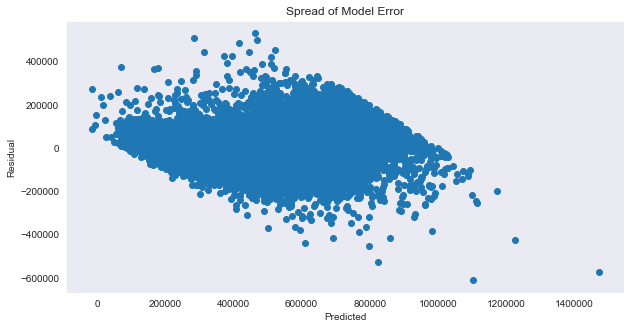

In [40]:
predicted = full_lr.predict(X_scaled)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error")
#plt.ylim([-5,10])
plt.show()
#Error distribution is not even, so a better model is needed

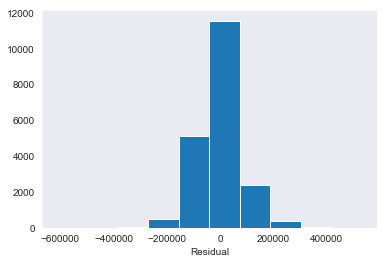

In [41]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [42]:
pearson_test = full_lr.score(X_test, Y_test)
adj_test = AdjustedR(pearson_test, X_test.shape[0], X_test.shape[1])

evaluation.iloc[1] = ['Multivariable Regression (non-PCA)', mae, pearson_test, adj_test]
evaluation

,Model,Mean Absolute Error (MAE),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,126549.402,0.362479,-
1,Multivariable Regression (non-PCA),59415.446,0.826756,0.823192
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


# Multiple Variable Regression with PCA

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_scaled, Y, test_size=.2, random_state=10)
comp_lr = LinearRegression(fit_intercept=False)
comp_lr.fit(X_train, Y_train)
pearson_test = comp_lr.score(X_test, Y_test)
print("20% sample test score: ", pearson_test)
print("\nIntercept: ", comp_lr.intercept_)
print("\nCoefficients: ", comp_lr.coef_)
mae = format(metrics.mean_absolute_error(Y_test, comp_lr.predict(X_test)), '.3f')
print("\nMean Squared Error: ", mae)
X_train.columns

20% sample test score:  0.7958640246533928

Intercept:  0.0

Coefficients:  [ 59446.43064183   6793.39918176  22605.36092578  13999.83450175
  41758.66142954   5678.23286287  -2246.7301675  278727.46528516
 283640.95372622 292236.64635826 797177.28211451 647044.15576553
 588593.62776031 554599.90353912 544486.42203428 366963.97669332
 451669.88130196 372480.68463648 379284.69658784 270357.13694378
 275638.31793323 417595.69087265 489832.1025577  436201.75028034
 540453.22322551 290004.45713816 293652.32316742 283348.73109692
 607362.13802369 479995.52691999 328237.98637198 923368.3671077
 733681.62703533 295242.21152044 375722.22269017 569656.47515709
 560636.20576474 341218.76081748 404447.65411061 331695.361242
 404413.44016085 448024.15500071 348184.57083246 471784.12280675
 540521.46681607 570542.09267249 484999.55098191 276774.2103252
 708756.85687148 619769.69485034 693127.26618591 405910.72266218
 621788.8771013  415797.91827528 733539.47404757 734100.27965798
 628497.96404739 6

Index(['Living Quality',     'waterfront',           'view',      'condition',
              'log_lot',      'renovated',       'Basement',            98001,
                  98002,            98003,            98004,            98005,
                  98006,            98007,            98008,            98010,
                  98011,            98014,            98019,            98022,
                  98023,            98024,            98027,            98028,
                  98029,            98030,            98031,            98032,
                  98033,            98034,            98038,            98039,
                  98040,            98042,            98045,            98052,
                  98053,            98055,            98056,            98058,
                  98059,            98065,            98070,            98072,
                  98074,            98075,            98077,            98092,
                  98102,            98103,          

In [44]:
cross_val_score(comp_lr, X_pca_scaled, Y, cv=10)

array([0.80325347, 0.78884583, 0.79792622, 0.76970302, 0.78588154,
       0.79264901, 0.79809615, 0.79490667, 0.78104415, 0.71952294])

In [45]:


adj_test = AdjustedR(pearson_test, X_test.shape[0], X_test.shape[1])
evaluation.iloc[2] = ['Multivariable Regression (PCA feats)', mae, pearson_test, adj_test]
evaluation

,Model,Mean Absolute Error (MAE),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,126549.402,0.362479,-
1,Multivariable Regression (non-PCA),59415.446,0.826756,0.823192
2,Multivariable Regression (PCA feats),65254.112,0.795864,0.791876
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


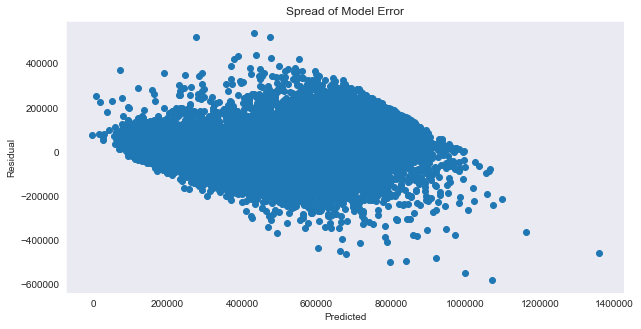

In [46]:
predicted = comp_lr.predict(X_pca_scaled)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error")

plt.show()

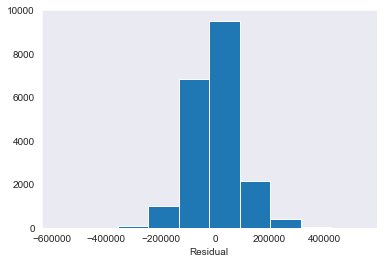

In [47]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

## Lasso Regression

In [48]:
from sklearn.linear_model import Lasso
#Lets try to do lasso without the pca to see if we can get some interpretability
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=.2, random_state=10)
lasso = Lasso(alpha=.0001, fit_intercept=False, random_state=123, max_iter=5000, tol=.0001)
#try different lambdas
lasso.fit(X_train, Y_train)
print(X_scaled.columns)
print("\n20% sample score: ", lasso.score(X_test, Y_test))
print("\nCoefficients: ", lasso.coef_)

mae = format(metrics.mean_absolute_error(Y_test, lasso.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)
#convert into scientific notation for better interpretability

Index([   'bedrooms',   'bathrooms', 'sqft_living',      'floors',
        'waterfront',        'view',   'condition',       'grade',
           'log_lot',   'renovated',    'Basement',         98001,
               98002,         98003,         98004,         98005,
               98006,         98007,         98008,         98010,
               98011,         98014,         98019,         98022,
               98023,         98024,         98027,         98028,
               98029,         98030,         98031,         98032,
               98033,         98034,         98038,         98039,
               98040,         98042,         98045,         98052,
               98053,         98055,         98056,         98058,
               98059,         98065,         98070,         98072,
               98074,         98075,         98077,         98092,
               98102,         98103,         98105,         98106,
               98107,         98108,         98109,         98

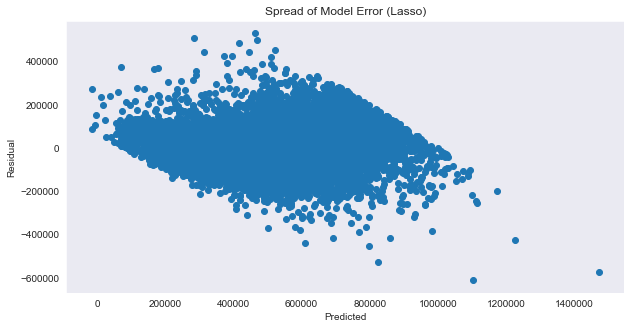

In [49]:
predicted = lasso.predict(X_scaled)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error (Lasso)")
plt.show()
#Error distribution is not even, so a better model is needed

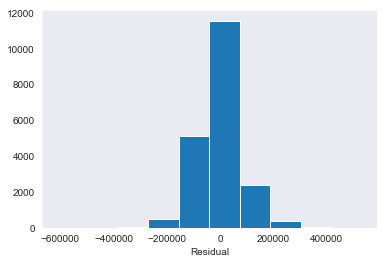

In [50]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [51]:
pearson_test = lasso.score(X_test, Y_test)
adj_test = AdjustedR(pearson_test, X_test.shape[0], X_test.shape[1])
evaluation.iloc[3] = ['Lasso', mae, pearson_test, adj_test]
evaluation

,Model,Mean Absolute Error (MAE),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,126549.402,0.362479,-
1,Multivariable Regression (non-PCA),59415.446,0.826756,0.823192
2,Multivariable Regression (PCA feats),65254.112,0.795864,0.791876
3,Lasso,59415.446,0.826756,0.823192
4,NaN,NaN,NaN,NaN


In [52]:
cross_val_score(lasso, X_scaled, Y, cv=10)

array([0.82922752, 0.81689167, 0.82754509, 0.80887369, 0.82512993,
       0.82926064, 0.83161644, 0.83121501, 0.81557247, 0.79184931])

# Gradient Boosting Regressor for feature selection

In [53]:
from sklearn import ensemble
param = {"max_depth": 6,
          "max_features": (len(X_dummy.columns)//3), #many statistical papers suggest n_feats/3 for regression
          "random_state": 10,
          "learning_rate": .125,
          "n_estimators": 190}
boost = ensemble.GradientBoostingRegressor(**param)
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size=.2, random_state=10)

boost.fit(X_train, Y_train)
pearson_test = boost.score(X_test, Y_test)
print("\n20% sample score: ", pearson_test)
mae_boost = format(metrics.mean_absolute_error(Y_test, boost.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)

C:\Users\sohai\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



20% sample score:  0.8440690061800151

Mean Absolute Error:  59415.446


In [56]:
clean = []
remove = []
feat_labels = X.columns
for feature in zip(feat_labels, boost.feature_importances_):
    if (feature[1]<0):
        print(feature)
        remove.append(feature[0])
    elif (feature[1]>.01):
        print(feature)
        clean.append(feature[0])
X = X.drop(remove, axis=1)
X_ = X_.drop(remove, axis=1)
print(clean)
features = ['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'waterfront', 'renovated', 'Basement']

('bedrooms', 0.029610940783534972)
('bathrooms', 0.04315088195640435)
('sqft_living', 0.1138655299790356)
('floors', 0.024238263138457672)
('view', 0.02537461251432839)
('condition', 0.026863057885723688)
('grade', 0.0689388474832222)
('log_lot', 0.13369536046670036)
('Basement', 0.014590933164967157)
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'condition', 'grade', 'log_lot', 'Basement']


In [57]:
evaluation.iloc[4] = ['Gradient Boosted Regressor', mae_boost, pearson_test, '-']
evaluation

,Model,Mean Absolute Error (MAE),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,126549.402,0.362479,-
1,Multivariable Regression (non-PCA),59415.446,0.826756,0.823192
2,Multivariable Regression (PCA feats),65254.112,0.795864,0.791876
3,Lasso,59415.446,0.826756,0.823192
4,Gradient Boosted Regressor,55584.303,0.844069,-


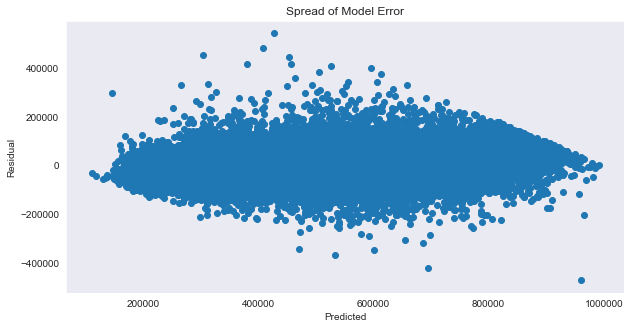

In [58]:
predicted = boost.predict(X_dummy)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error")
plt.show()
#Error distribution is not even, so a better model is needed
#compare the variance and std deviation of the residuals

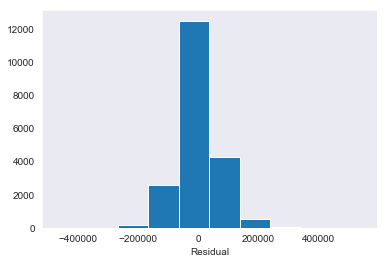

In [59]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [60]:
display(cross_val_score(boost, X_dummy, Y, cv=10))

array([0.84040845, 0.83463021, 0.84947523, 0.82866122, 0.83035854,
       0.85009318, 0.84861759, 0.85081805, 0.83188875, 0.83226269])

# Final evaluation of model choice

In [61]:
evaluation.iloc[np.argsort(evaluation['R^2 Test'])].reset_index(drop=True)

,Model,Mean Absolute Error (MAE),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,126549.402,0.362479,-
1,Multivariable Regression (PCA feats),65254.112,0.795864,0.791876
2,Lasso,59415.446,0.826756,0.823192
3,Multivariable Regression (non-PCA),59415.446,0.826756,0.823192
4,Gradient Boosted Regressor,55584.303,0.844069,-
